# Experiment 4

## Problem Statement:

Write a python program to solve the Multi-Armed Bandit Problem using Thompson Sampling.

## Code

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def thompson_sampling_bandit(arms, num_steps):
    num_arms = len(arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    total_reward_ts = 0
    rewards_ts = []

    for t in range(1, num_steps + 1):
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        action = np.argmax(sampled_theta)

        reward = arms[action]()
        total_reward_ts += reward

        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

        rewards_ts.append(total_reward_ts / t)

    return rewards_ts


In [3]:
def generate_bandit_arms(num_arms, true_probs):
    return [lambda p=true_probs[i]: np.random.binomial(1, p) for i in range(num_arms)]

In [4]:
def plot_results(steps, ts_rewards):
    plt.plot(range(1, steps + 1), ts_rewards, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('Thompson Sampling in Multi-Armed Bandit Problem')
    plt.show()

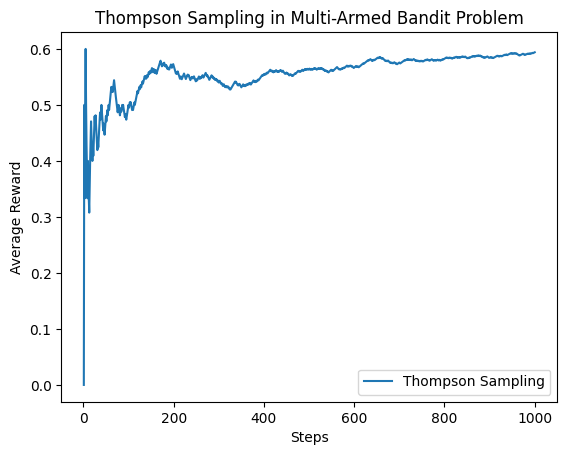

In [5]:
if __name__ == '__main__':
    num_arms = 5
    true_probs = np.random.uniform(0.2, 0.8, num_arms)
    num_steps = 1000

    arms = generate_bandit_arms(num_arms, true_probs)
    ts_rewards = thompson_sampling_bandit(arms, num_steps)

    # Plot results
    plot_results(num_steps, ts_rewards)